In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
Data = pd.read_csv('/content/placementdata.csv')
Data.head()



,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [ ]:
Data_clean = Data.drop([], axis=1)

In [ ]:
Data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [ ]:
print("Columns in DataFrame:\n", Data.columns.tolist())

# 1. Drop
cols_to_drop = [ 'StudentID', 'SSC_Marks', 'HSC_Marks', 'PlacementStatus']

Data.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 2. Verify
print("After dropping, columns are:\n", Data.columns.tolist())

Columns in DataFrame:
 ['StudentID', 'CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks', 'HSC_Marks', 'PlacementStatus']
After dropping, columns are:
 ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining']


In [ ]:
Data.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining
0,7.5,1,1,1,65,4.4,No,No
1,8.9,0,3,2,90,4.0,Yes,Yes
2,7.3,1,2,2,82,4.8,Yes,No
3,7.5,1,1,2,85,4.4,Yes,Yes
4,8.3,1,2,2,86,4.5,Yes,Yes


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       10000 non-null  float64
 1   Internships                10000 non-null  int64  
 2   Projects                   10000 non-null  int64  
 3   Workshops/Certifications   10000 non-null  int64  
 4   AptitudeTestScore          10000 non-null  int64  
 5   SoftSkillsRating           10000 non-null  float64
 6   ExtracurricularActivities  10000 non-null  object 
 7   PlacementTraining          10000 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 625.1+ KB


In [ ]:
Data.isnull().sum().sum()

# check for missing values

np.int64(0)

In [ ]:
Data.duplicated().sum()

# check for duplicates values

np.int64(1347)

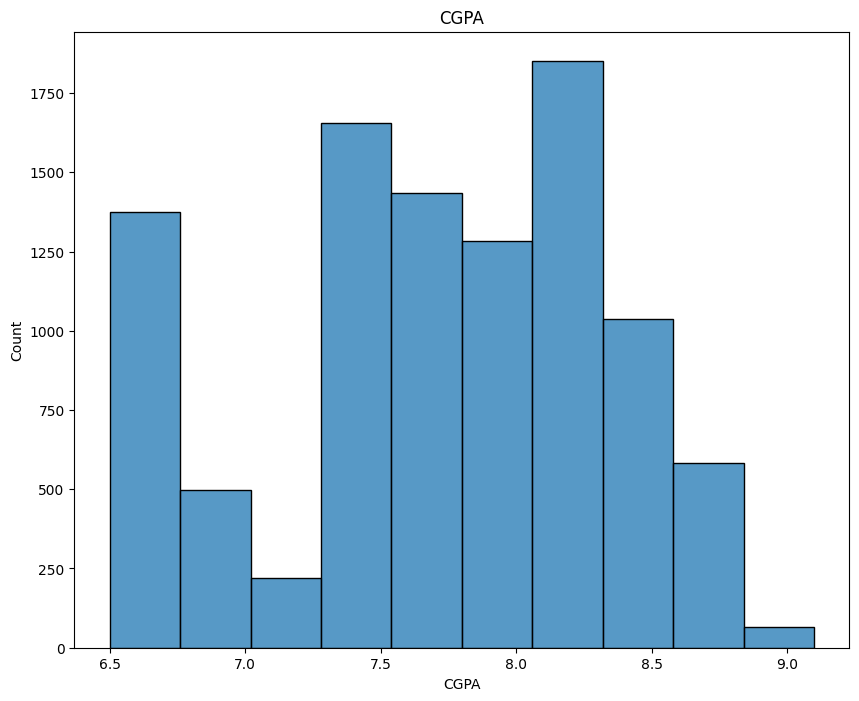

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(x='CGPA',data=Data,bins=10)
plt.title("CGPA")
plt.show()

# explore the data with histplot

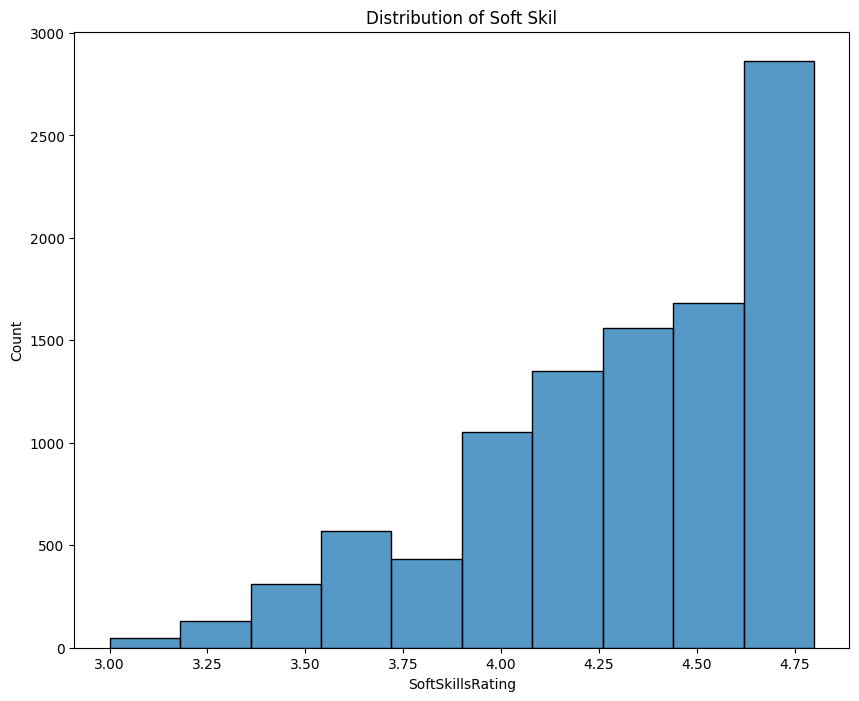

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(x='SoftSkillsRating',data=Data,bins=10)
plt.title("Distribution of Soft Skil")
plt.show()

# explore the data with histplot

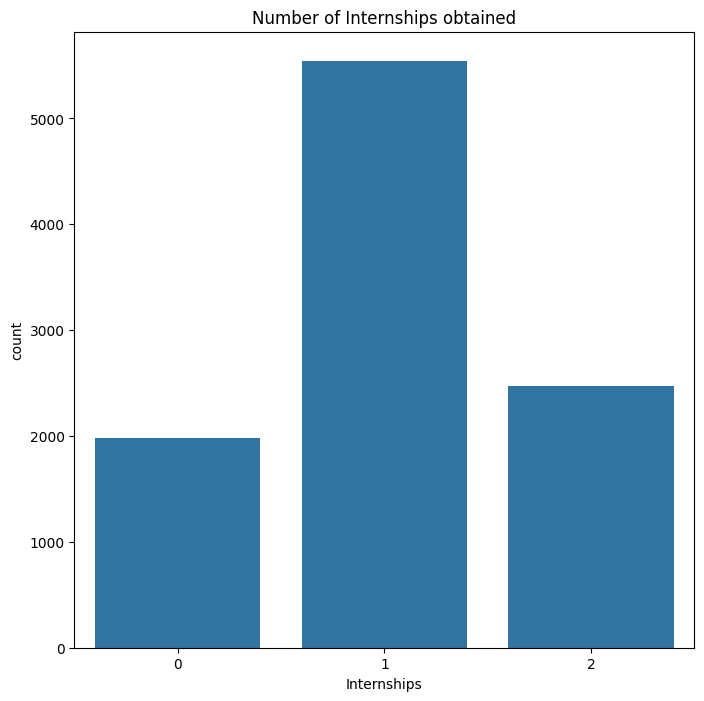

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Internships',data=Data)
plt.title("Number of Internships obtained")
plt.show()

# explore the data with countplot

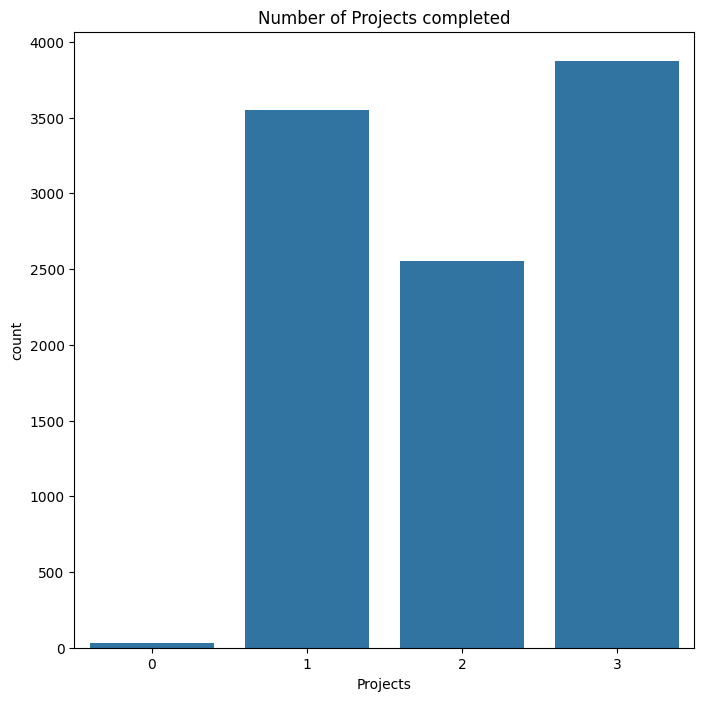

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Projects',data=Data)
plt.title("Number of Projects completed")
plt.show()

# explore the data with countplot

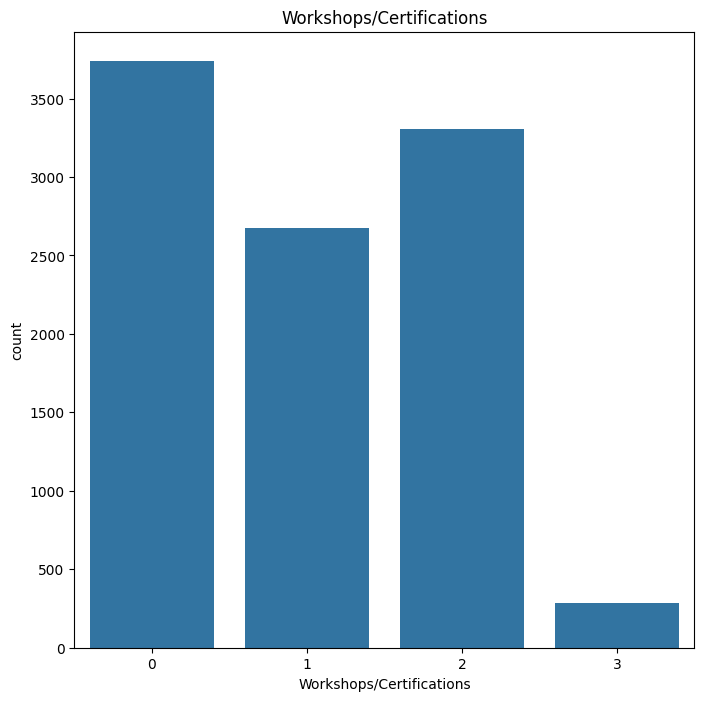

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Workshops/Certifications',data=Data)
plt.title("Workshops/Certifications")
plt.show()

# explore the data with countplot


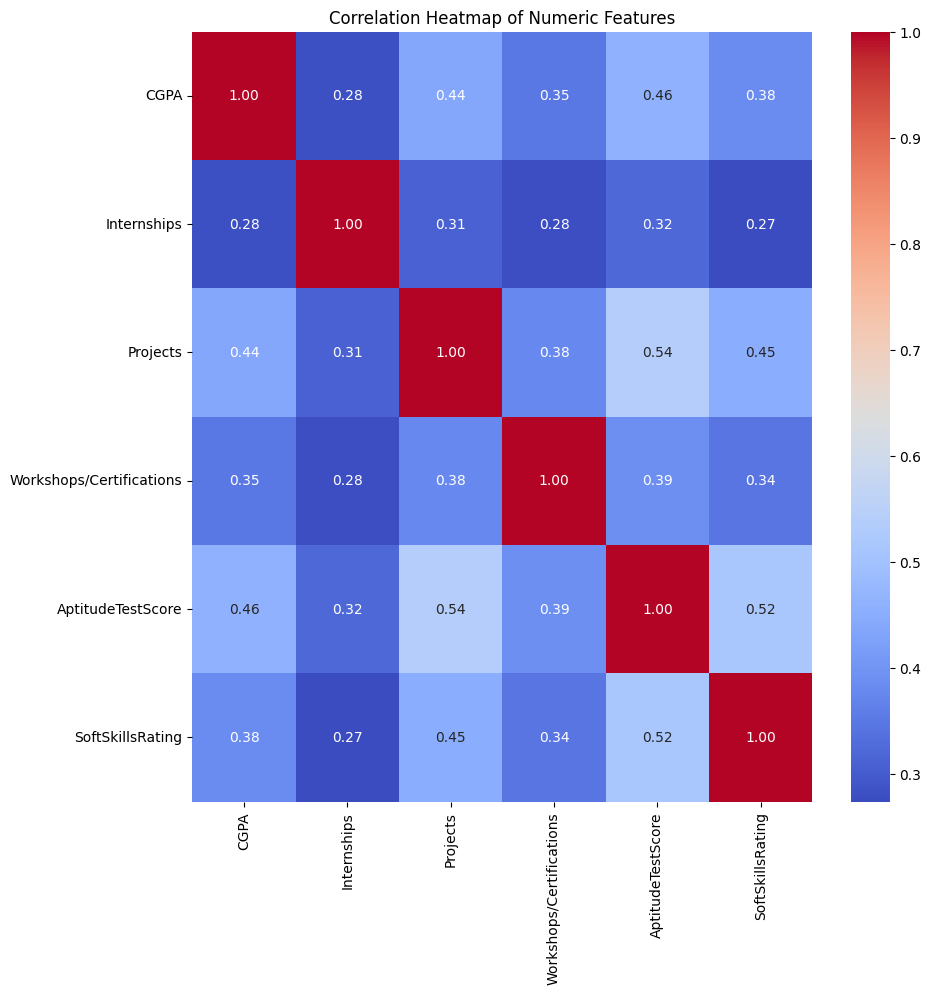

In [ ]:
# Select only numeric columns for correlation
numeric_data = Data.select_dtypes(include='number')

plt.figure(figsize=(10, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:

cols_to_convert = [
    'CGPA',
    'Internships',
    'Projects',
    'Workshops/Certifications',
    'AptitudeTestScore',
    'SoftSkillsRating',
    'ExtracurricularActivities',
    'PlacementTraining'
]

for col in cols_to_convert:
    Data[col] = pd.to_numeric(Data[col], errors='coerce').fillna(0)

# Function to estimate salary range
def estimate_salary_range(row, base=2.0, range_pct=0.20):
    salary = base

    # Academic Performance (max +3.0)
    if row['CGPA'] >= 9.0:
        salary += 3.0
    elif row['CGPA'] >= 8.0:
        salary += 2.0
    elif row['CGPA'] >= 7.0:
        salary += 1.0

    # Internships (max +2.0)
    if row['Internships'] >= 3:
        salary += 2.0
    elif row['Internships'] == 2:
        salary += 1.0
    elif row['Internships'] == 1:
        salary += 0.5

    # Projects (max +1.5)
    if row['Projects'] >= 4:
        salary += 1.5
    elif row['Projects'] == 3:
        salary += 1.0
    elif row['Projects'] == 2:
        salary += 0.5

    # Certifications (max +1.2)
    if row['Workshops/Certifications'] >= 4:
        salary += 1.2
    elif row['Workshops/Certifications'] == 3:
        salary += 1.0
    elif row['Workshops/Certifications'] == 2:
        salary += 0.6

    # Aptitude (max +1.0)
    if row['AptitudeTestScore'] >= 85:
        salary += 1.0
    elif row['AptitudeTestScore'] >= 75:
        salary += 0.7
    elif row['AptitudeTestScore'] >= 65:
        salary += 0.5

    # Soft Skills (max +0.8)
    if row['SoftSkillsRating'] >= 4.5:
        salary += 0.8
    elif row['SoftSkillsRating'] >= 4.0:
        salary += 0.5

    # Extracurriculars (max +0.5)
    if row['ExtracurricularActivities'] >= 2:
        salary += 0.5

    # Placement Training (max +0.5)
    if row['PlacementTraining'] >= 1:
        salary += 0.5

    # Cap the final salary
    salary = min(salary, 15.0)

    # Calculate range
    lower = round(salary * (1 - range_pct), 2)
    upper = round(salary * (1 + range_pct), 2)
    width_pct = round((upper - lower) / salary * 100, 2)

    return pd.Series({
        'Salary_Point_LPA': round(salary, 2),
        'Salary_Lower_LPA': lower,
        'Salary_Upper_LPA': upper,
        'Salary_Range_Width_pct': width_pct
    })

# Apply function
salary_df = Data.apply(estimate_salary_range, axis=1)
Data = pd.concat([Data, salary_df], axis=1)

# Optional: Save to file
Data.to_csv("placement_data_with_salary_range.csv", index=False)
print(" Added salary range columns successfully!")

 Added salary range columns successfully!


In [ ]:
features = [
    'CGPA',
    'Internships',
    'Projects',
    'Workshops/Certifications',
    'AptitudeTestScore',
    'SoftSkillsRating',
    'ExtracurricularActivities',
    'PlacementTraining'
]
target = 'Salary_Point_LPA'

In [ ]:
Data.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,Salary_Point_LPA,Salary_Lower_LPA,Salary_Upper_LPA,Salary_Range_Width_pct
0,7.5,1,1,1,65,4.4,0.0,0.0,4.5,3.60,5.40,40.0
1,8.9,0,3,2,90,4.0,0.0,0.0,7.1,5.68,8.52,40.0
2,7.3,1,2,2,82,4.8,0.0,0.0,6.1,4.88,7.32,40.0
3,7.5,1,1,2,85,4.4,0.0,0.0,5.6,4.48,6.72,40.0
4,8.3,1,2,2,86,4.5,0.0,0.0,7.4,5.92,8.88,40.0


In [ ]:
# Convert selected features to numeric and fill NaNs with 0
Data[features] = Data[features].apply(pd.to_numeric, errors='coerce')
Data.fillna(0, inplace=True)

# Define feature matrix X and target vector y
X = Data[features]
y = Data[target]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = pipeline.predict(X_test)

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Model Performance on Test Set:")
print(f"  R² Score: {r2:.3f}")
print(f"  MAE     : ₹{mae:.2f} LPA")
print(f"  RMSE    : ₹{rmse:.2f} LPA")


 Model Performance on Test Set:
  R² Score: 0.999
  MAE     : ₹0.02 LPA
  RMSE    : ₹0.06 LPA


In [ ]:
importances = pipeline.named_steps['model'].feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values()

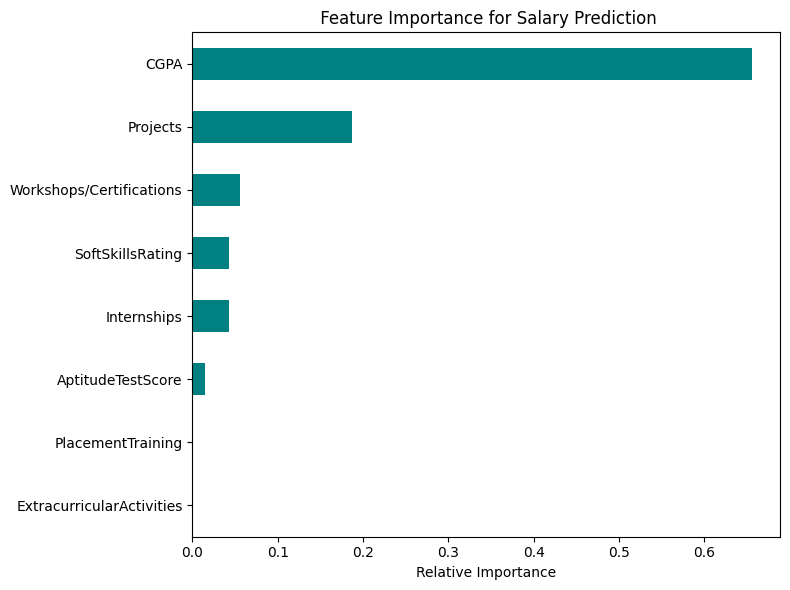

In [ ]:
plt.figure(figsize=(8,6))
feat_imp.plot(kind='barh', color='teal')
plt.title(" Feature Importance for Salary Prediction")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

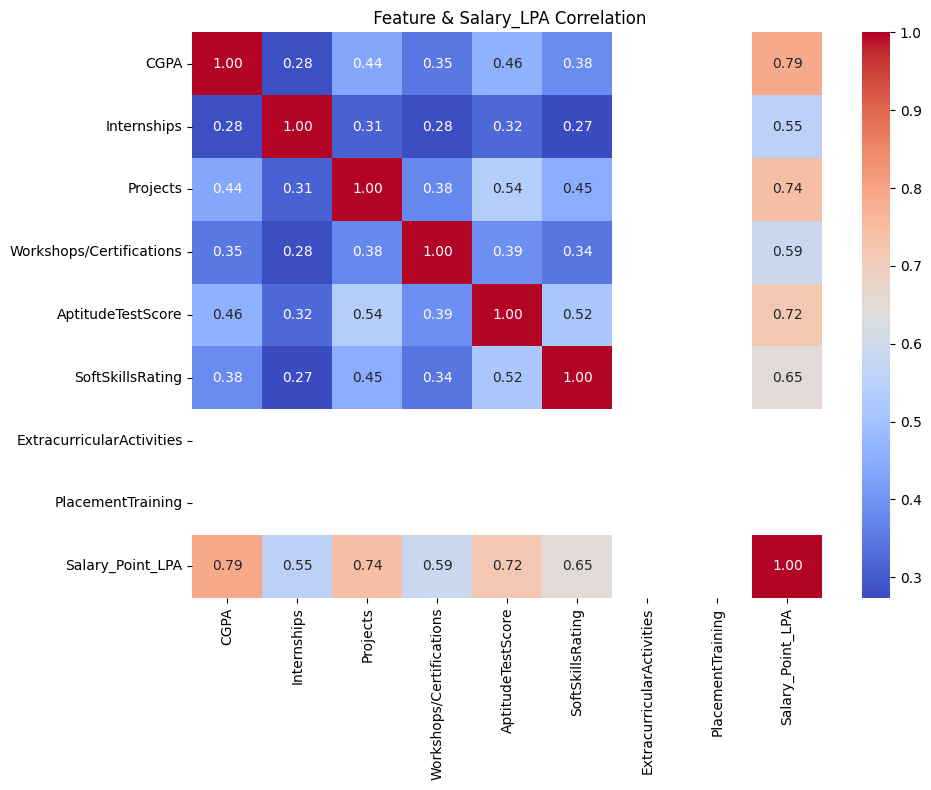

In [ ]:
corr = Data[features + [target]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(" Feature & Salary_LPA Correlation")
plt.tight_layout()
plt.show()

In [ ]:
def predict_salary_for_student(**student_info):
    # Convert single student dict to a DataFrame row
    student_df = pd.DataFrame([student_info])

    # Use the same scoring logic from estimate_salary_range
    result = estimate_salary_range(student_df.iloc[0])  # Apply to a single row (Series)

    print(f"\n Estimated Salary Range: ₹{result['Salary_Lower_LPA']} – ₹{result['Salary_Upper_LPA']} LPA")
    print(f" Predicted Salary (center): ₹{result['Salary_Point_LPA']} LPA")

    # Optional advice for weak performance
    if result['Salary_Point_LPA'] < 4.0:
        print("  Salary is below average. Suggested improvements:")
        diffs = {}
        for feat in features:
            avg = Data[feat].mean()
            gap = avg - student_info.get(feat, 0)
            diffs[feat] = gap
        suggestions = sorted(diffs.items(), key=lambda x: x[1], reverse=True)[:3]
        for feat, gap in suggestions:
            print(f"   • Improve {feat} (you are {gap:.1f} below average)")
    else:
        print(" Great! Salary prediction looks strong.")


In [ ]:
# Weak student
student1 = {
    'CGPA': 6.8,
    'Internships': 0,
    'Projects': 1,
    'Workshops/Certifications': 1,
    'AptitudeTestScore': 60,
    'SoftSkillsRating': 3.5,
    'ExtracurricularActivities': 0,
    'PlacementTraining': 0
}

# Average student
student2 = {
    'CGPA': 7.8,
    'Internships': 1,
    'Projects': 3,
    'Workshops/Certifications': 2,
    'AptitudeTestScore': 72,
    'SoftSkillsRating': 4.2,
    'ExtracurricularActivities': 1,
    'PlacementTraining': 1
}

# Strong student
student3 = {
    'CGPA': 9.2,
    'Internships': 3,
    'Projects': 4,
    'Workshops/Certifications': 4,
    'AptitudeTestScore': 90,
    'SoftSkillsRating': 4.7,
    'ExtracurricularActivities': 2,
    'PlacementTraining': 1
}

predict_salary_for_student(**student1)
predict_salary_for_student(**student2)
predict_salary_for_student(**student3)



 Estimated Salary Range: ₹1.6 – ₹2.4 LPA
 Predicted Salary (center): ₹2.0 LPA
  Salary is below average. Suggested improvements:
   • Improve AptitudeTestScore (you are 19.4 below average)
   • Improve Internships (you are 1.0 below average)
   • Improve Projects (you are 1.0 below average)

 Estimated Salary Range: ₹5.28 – ₹7.92 LPA
 Predicted Salary (center): ₹6.6 LPA
 Great! Salary prediction looks strong.

 Estimated Salary Range: ₹10.0 – ₹15.0 LPA
 Predicted Salary (center): ₹12.5 LPA
 Great! Salary prediction looks strong.


In [ ]:
student4 = {
    'CGPA': 9.1,
    'Internships': 0,
    'Projects': 2,
    'Workshops/Certifications': 1,
    'AptitudeTestScore': 65,
    'SoftSkillsRating': 2.8,  # Very weak soft skills
    'ExtracurricularActivities': 0,
    'PlacementTraining': 0
}


In [ ]:
student5 = {
    'CGPA': 7.0,
    'Internships': 0,
    'Projects': 1,
    'Workshops/Certifications': 0,
    'AptitudeTestScore': 60,
    'SoftSkillsRating': 4.8,
    'ExtracurricularActivities': 3,
    'PlacementTraining': 1
}


In [ ]:
student6 = {
    'CGPA': 7.5,
    'Internships': 2,
    'Projects': 4,
    'Workshops/Certifications': 5,
    'AptitudeTestScore': 78,
    'SoftSkillsRating': 3.9,
    'ExtracurricularActivities': 0,
    'PlacementTraining': 1
}


In [ ]:
predict_salary_for_student(**student4)
predict_salary_for_student(**student5)
predict_salary_for_student(**student6)




 Estimated Salary Range: ₹4.8 – ₹7.2 LPA
 Predicted Salary (center): ₹6.0 LPA
 Great! Salary prediction looks strong.

 Estimated Salary Range: ₹3.84 – ₹5.76 LPA
 Predicted Salary (center): ₹4.8 LPA
 Great! Salary prediction looks strong.

 Estimated Salary Range: ₹6.32 – ₹9.48 LPA
 Predicted Salary (center): ₹7.9 LPA
 Great! Salary prediction looks strong.


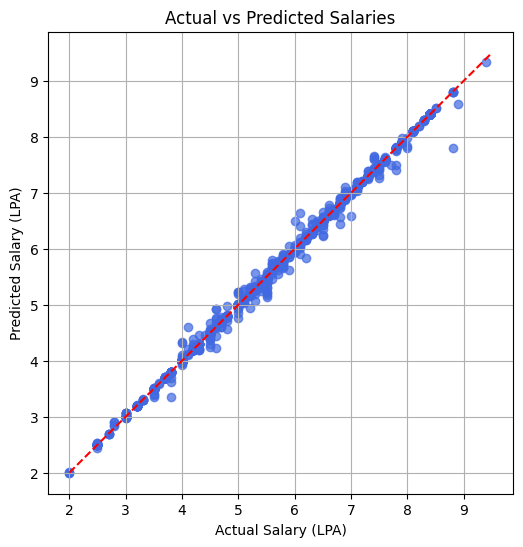

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='royalblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Salary (LPA)")
plt.ylabel("Predicted Salary (LPA)")
plt.title("Actual vs Predicted Salaries")
plt.grid(True)
plt.show()


In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)
